In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import xgboost as xgb
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix

In [2]:
dutch = pd.read_excel('dutch.xlsx')
print(dutch.shape)
dictionary = {'Alive' : 0, 'Deceased' : 1}
dutch = dutch.replace({'Survival/death': dictionary})
dutch.head()

(305, 15)


,Age,Gender,Date of presentation emergency room,Date of admission,Date of discharge,Admission to ICU,Survival/death,Date of death,Days from admission to death,Date blood analysis,LD,CRP,Lymphocytes,Leukocytes,Percentage lymphocytes
0,73,Male,2020-03-19,2020-03-19 00:00:00,2020-05-26 00:00:00,Yes,0,NaT,NaN,2020-03-19,485,154,0.62,6.6,9.393939
1,60,Female,2020-03-18,2020-03-18 00:00:00,2020-03-22 00:00:00,No,0,NaT,NaN,2020-03-20,316,77,1.61,7.7,20.909091
2,44,Female,2020-03-20,2020-03-20 00:00:00,2020-03-24 00:00:00,No,0,NaT,NaN,2020-03-20,444,82,0.81,6.8,11.911765
3,58,Male,2020-03-20,2020-03-20 00:00:00,2020-03-23 00:00:00,Yes,0,NaT,NaN,2020-03-20,323,58,0.73,5.8,12.586207
4,66,Male,2020-03-20,2020-03-20 00:00:00,2020-03-25 00:00:00,No,0,NaT,NaN,2020-03-20,244,20,1.39,5.1,27.254902


In [3]:
france = pd.read_excel('french.xlsx')
print(france.shape)

france1 = france.replace('^\.', np.nan, regex=True)
france1.loc[:, 'ddimere_J1':] = france1.loc[:, 'ddimere_J1':].astype(float)

france1.head()

(178, 43)


,id,HR_min,HR_max,SBP_min,SBP_max,DBP_min,DBP_max,SAPSII,RR,GCS,...,ldh_j1,ldh_j2,ldh_j3,ldh_j4,ldh_j5,L_pourc_J1,L_pourc_J2,L_pourc_J3,L_pourc_J4,L_pourc_J5
0,49,61,94,93,190,66,132,27,28.0,15,...,NaN,465.0,457.0,412.0,362.0,25.0000,NaN,NaN,NaN,NaN
1,52,85,105,90,107,56,73,31,28.0,15,...,652.0,900.0,NaN,NaN,NaN,NaN,13.3333,NaN,NaN,NaN
2,55,81,170,101,154,48,66,54,20.0,15,...,498.0,505.0,NaN,NaN,596.0,NaN,NaN,NaN,NaN,NaN
3,56,79,124,105,132,40,65,27,NaN,15,...,568.0,NaN,NaN,NaN,NaN,4.1667,NaN,NaN,NaN,NaN
4,58,77,90,110,166,54,80,47,NaN,15,...,455.0,450.0,535.0,NaN,497.0,10.0000,NaN,NaN,4.1176,NaN


In [4]:
usa = pd.read_csv('Yan_reply_First_last_wtime.csv')
print(usa.shape)
usa.head()

(1038, 14)


,ClientVisitGUID,Expired_Outcome,Last_LDH,Last_CRP,Last_Lymph,First_LDH,First_CRP,First_Lymph,Last_time_LDH,Last_time_CRP,Last_time_Lymph,First_time_LDH,First_time_CRP,First_time_Lymph
0,1298314042,1,641,57.5,4.5,598,54.30,4.5,2 days 11:12:59,0 days 05:24:53,1 days 21:43:56,2 days 15:51:00,2 days 15:49:10,1 days 21:43:57
1,231729013,1,334,100.4,0.9,334,223.60,0.9,4 days 23:49:43,2 days 23:51:48,6 days 17:33:16,4 days 23:49:43,4 days 22:42:30,35 days 22:23:14
2,292613519,1,742,168.2,2.8,525,16.77,8.1,0 days 03:04:19,0 days 03:04:10,-1 days +23:56:08,14 days 15:58:27,15 days 18:47:49,11 days 00:51:43
3,1624500118,1,613,19.3,0.9,296,19.30,22.1,0 days 08:42:44,2 days 14:31:34,0 days 10:37:16,5 days 00:35:01,2 days 14:31:34,24 days 22:08:05
4,1101470227,1,271,25.1,2.6,374,46.70,5.4,0 days 23:21:10,-1 days +22:54:57,-1 days +20:35:07,24 days 13:05:59,24 days 13:28:36,27 days 01:15:44


In [5]:
china = pd.read_excel('time_series_375_prerpocess_en.xlsx')

china = china[['PATIENT_ID', 'RE_DATE', 'age', 'gender', 'Admission time', 'Discharge time', 'outcome', 'Lactate dehydrogenase', '(%)lymphocyte', 'High sensitivity C-reactive protein']]

china = china.rename(columns={'Lactate dehydrogenase': 'LDH', 
                               '(%)lymphocyte': 'Lymph', 
                               'High sensitivity C-reactive protein': 'CRP'})

index = 1

for i in range(len(china)):
    if np.isnan(china['PATIENT_ID'][i]):
        china['PATIENT_ID'][i] = index
    else:
        index = china['PATIENT_ID'][i]

print(china.shape)
china.head()

/home/przemek/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  del sys.path[0]


(6120, 10)


,PATIENT_ID,RE_DATE,age,gender,Admission time,Discharge time,outcome,LDH,Lymph,CRP
0,1.0,2020-01-31 01:09:00.000000,73,1,2020-01-30 22:12:47,2020-02-17 12:40:09,0,NaN,NaN,NaN
1,1.0,2020-01-31 01:25:00.000000,73,1,2020-01-30 22:12:47,2020-02-17 12:40:09,0,NaN,22.6,NaN
2,1.0,2020-01-31 01:44:00.000000,73,1,2020-01-30 22:12:47,2020-02-17 12:40:09,0,306.0,NaN,43.1
3,1.0,2020-01-31 01:44:59.999999,73,1,2020-01-30 22:12:47,2020-02-17 12:40:09,0,NaN,NaN,NaN
4,1.0,2020-01-31 01:56:00.000001,73,1,2020-01-30 22:12:47,2020-02-17 12:40:09,0,NaN,NaN,NaN


In [6]:
# funkcja do przekształeceina ramki z Wuhan, do postaci, gdzie mamy łatwo dostępny pierwszy i ostatni wynik
# usuwani s pacjeni, dla których nie ma wyników któregoś z badań

def transform_china(feature_name):
    n = len(china['PATIENT_ID'].unique())

    x = china.groupby('PATIENT_ID').sum().reset_index()
    indexes_to_omit = np.array(x[(x['LDH'] == 0) | (x['Lymph'] == 0) | (x['CRP'] == 0)]['PATIENT_ID'])

    for i in range(1, n+1):
        if i in indexes_to_omit:
            continue

        feature = china[china['PATIENT_ID'] == i][['PATIENT_ID', 'RE_DATE', feature_name]]
        feature = feature.pivot(index = 'PATIENT_ID', columns = 'RE_DATE', values = feature_name).dropna(axis = 1)

        first = feature.loc[:, min(feature.columns)].reset_index()
        first['First_' + feature_name + '_date'] = min(feature.columns)
        first = first.rename(columns = {min(feature.columns) : 'First_' + feature_name})

        last = feature.loc[:, max(feature.columns)].reset_index()
        last['Last_' + feature_name + '_date'] = max(feature.columns)
        last = last.rename(columns = {max(feature.columns) : 'Last_' + feature_name})

        if i == 1.0:
            output = pd.merge(first, last, on='PATIENT_ID')
            continue

        output = pd.concat([output, pd.merge(first, last, on='PATIENT_ID')])

    return output.reset_index(drop = True)

In [7]:
ldh = transform_china('LDH')
crp = transform_china('CRP')
lym = transform_china('Lymph')
cols = ['PATIENT_ID', 'age', 'gender', 'Admission time', 'Discharge time', 'outcome']
inf = china[cols].groupby(cols).min().reset_index()
china_new = pd.merge(pd.merge(inf, ldh, on = 'PATIENT_ID'), pd.merge(crp, lym, on = 'PATIENT_ID'), on = 'PATIENT_ID')
china_new

,PATIENT_ID,age,gender,Admission time,Discharge time,outcome,First_LDH,First_LDH_date,Last_LDH,Last_LDH_date,First_CRP,First_CRP_date,Last_CRP,Last_CRP_date,First_Lymph,First_Lymph_date,Last_Lymph,Last_Lymph_date
0,1.0,73,1,2020-01-30 22:12:47.000000,2020-02-17 12:40:09.000000,0,306.0,2020-01-31 01:44:00,206.0,2020-02-16 11:32:00.000000,43.1,2020-01-31 01:44:00,2.6,2020-02-15 10:41:00,22.6,2020-01-31 01:25:00.000000,25.9,2020-02-16 09:23:00.000000
1,2.0,61,1,2020-02-04 21:39:03.000000,2020-02-19 12:59:00.999999,0,738.0,2020-02-05 09:09:00,282.0,2020-02-17 13:59:00.000000,27.4,2020-02-05 09:09:00,27.4,2020-02-05 09:09:00,7.5,2020-02-05 07:34:00.000000,9.2,2020-02-17 12:26:00.000001
2,3.0,70,2,2020-01-23 10:59:36.000000,2020-02-08 17:52:31.000000,0,328.0,2020-01-23 15:12:00,226.0,2020-02-05 07:46:00.000000,42.3,2020-01-23 15:12:00,3.6,2020-01-30 13:06:00,19.1,2020-01-23 14:31:00.000000,27.3,2020-02-05 07:23:59.999999
3,4.0,74,1,2020-01-31 23:03:59.000000,2020-02-18 12:59:12.000000,0,338.0,2020-02-01 05:28:00,249.0,2020-02-06 07:30:00.000000,108.2,2020-02-01 05:28:00,14.5,2020-02-06 07:30:00,12.5,2020-02-01 05:08:00.000000,16.5,2020-02-14 16:51:00.000000
4,5.0,29,2,2020-02-01 20:59:53.999999,2020-02-18 10:33:06.000000,0,195.0,2020-02-02 00:48:00,179.0,2020-02-08 10:39:00.000000,7.0,2020-02-02 00:48:00,0.8,2020-02-08 10:39:00,37.9,2020-02-02 00:40:00.000000,23.6,2020-02-18 09:34:59.999999
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
346,371.0,63,1,2020-02-04 11:51:01.000000,2020-02-05 19:58:05.000000,1,573.0,2020-02-04 17:20:00,573.0,2020-02-04 17:20:00.000000,152.0,2020-02-04 17:20:00,152.0,2020-02-04 17:20:00,15.0,2020-02-04 15:55:00.000001,15.0,2020-02-04 15:55:00.000001
347,372.0,79,1,2020-02-05 17:52:06.000000,2020-02-16 10:45:40.000000,1,276.0,2020-02-06 03:33:00,607.0,2020-02-15 07:40:00.000001,320.0,2020-02-06 03:33:00,177.6,2020-02-14 07:39:00,1.6,2020-02-06 02:23:00.000000,0.6,2020-02-15 08:04:59.999999
348,373.0,61,2,2020-02-12 03:07:48.000000,2020-02-14 18:47:22.999999,1,702.0,2020-02-12 10:35:00,702.0,2020-02-12 10:35:00.000000,205.8,2020-02-12 10:35:00,205.8,2020-02-12 10:35:00,6.3,2020-02-12 10:18:00.000000,6.3,2020-02-12 10:18:00.000000
349,374.0,33,1,2020-02-03 22:16:30.000000,2020-02-08 10:47:24.000000,1,1385.0,2020-02-04 01:28:00,1867.0,2020-02-06 15:41:00.000000,196.8,2020-02-04 01:28:00,61.7,2020-02-06 15:41:00,2.3,2020-02-04 00:56:00.000000,2.3,2020-02-06 08:12:00.000000


Pairploty z Chin dużo lepiej odzielają grupy zmarłych pacjentów i tych, któzy przeżyli, ale i tak zazwyczaj większość punktów na siebie nachodzi

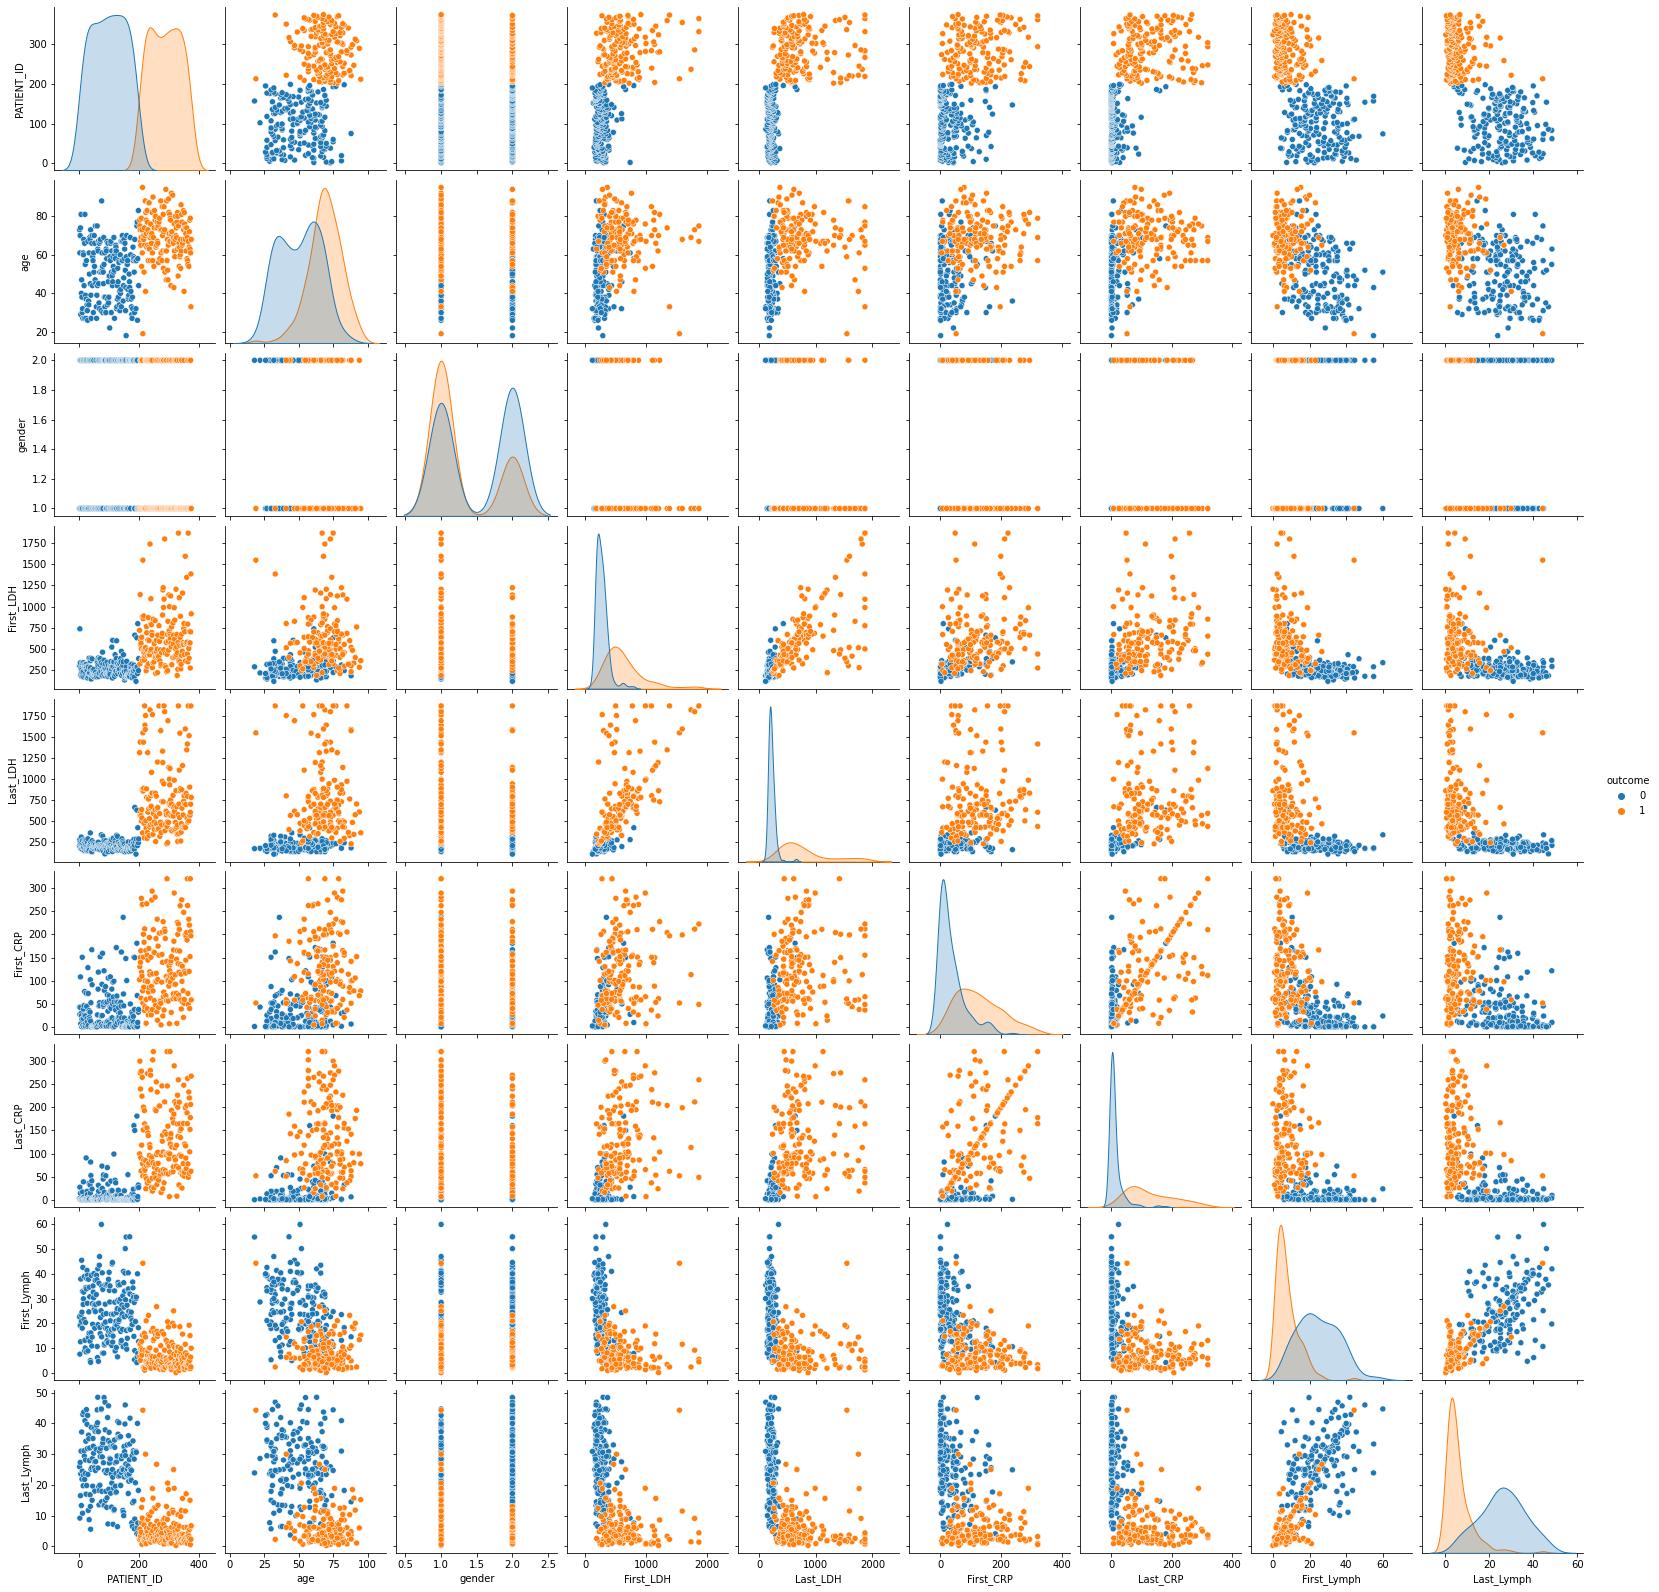

In [8]:
sns.pairplot(china_new, hue="outcome")

<AxesSubplot:xlabel='First_CRP', ylabel='First_Lymph'>

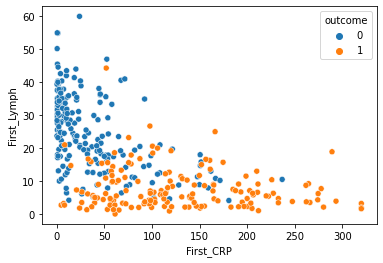

In [9]:
sns.scatterplot(data = china_new, x = 'First_CRP', y = 'First_Lymph', hue = 'outcome')

<AxesSubplot:xlabel='Last_LDH', ylabel='Last_Lymph'>

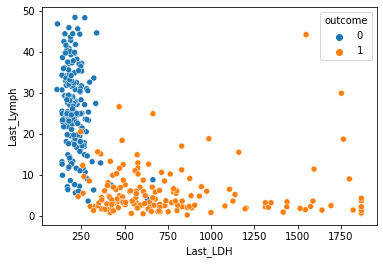

In [10]:
sns.scatterplot(data = china_new, x = 'Last_LDH', y = 'Last_Lymph', hue = 'outcome')

W Chińskiem zbiorze danych dobrze widać separacje zgonónów i wyzdowień już przy zależności między dwoma cechami, jednak tej zależności nie ma w innych zbiorach.

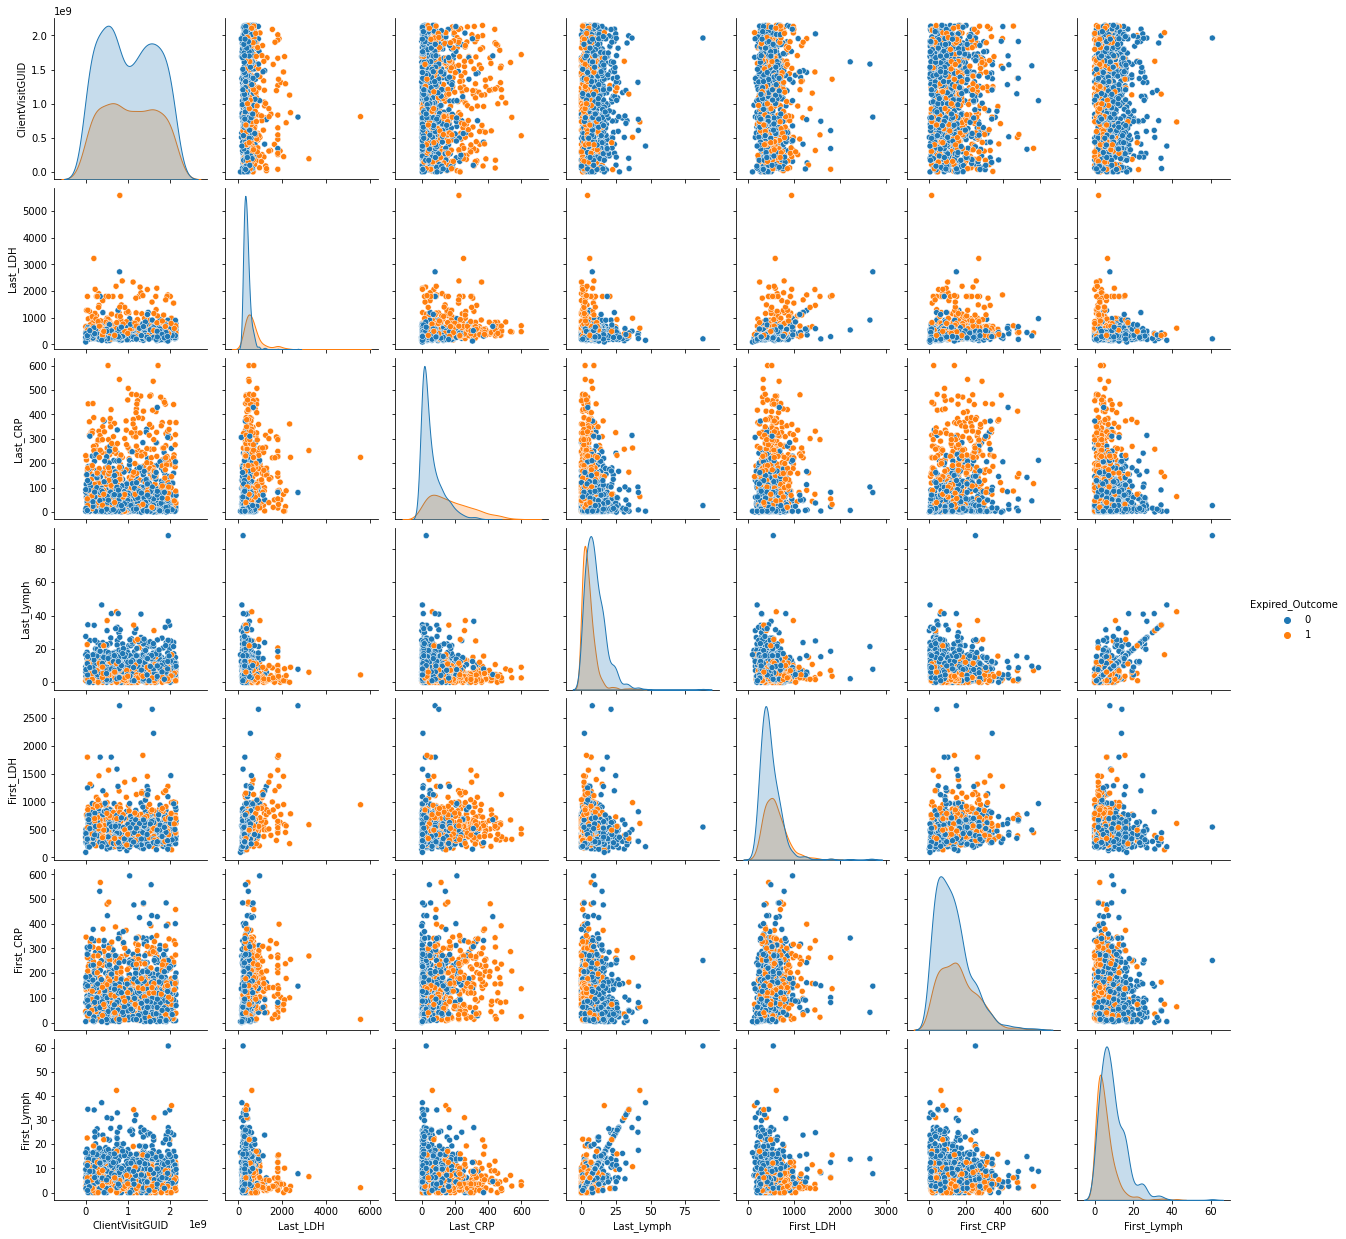

In [11]:
sns.pairplot(usa, hue="Expired_Outcome")

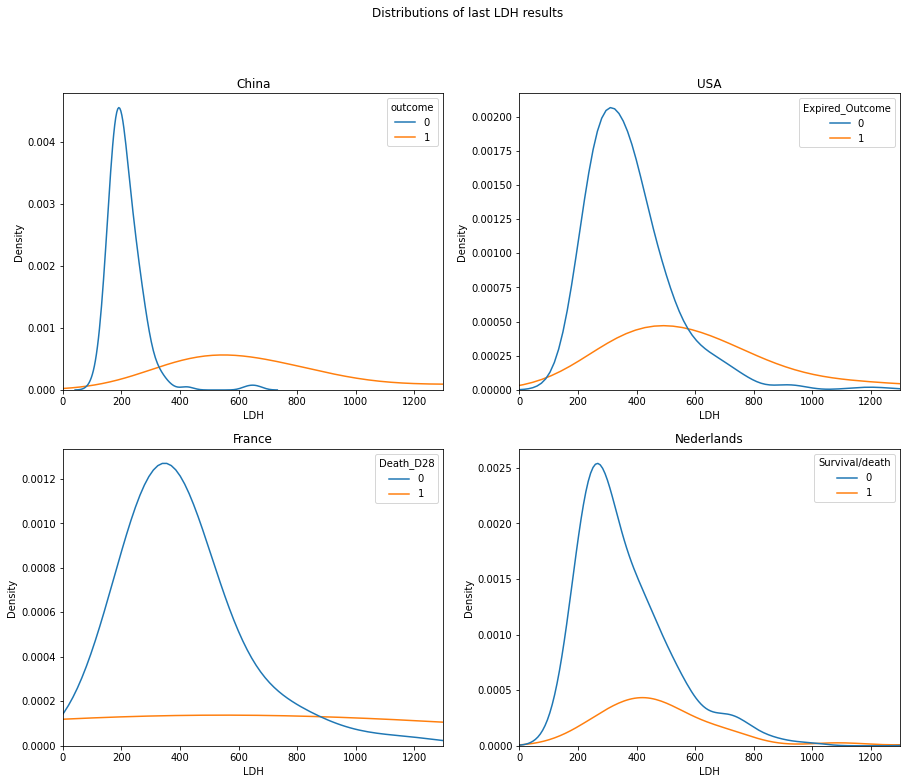

In [12]:
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(15, 12))

sns.kdeplot(data = china_new, x="Last_LDH", hue="outcome", ax = ax1)
ax1.set_title("China")
ax1.set_xlabel('LDH')
ax1.set_xlim([0, 1300])

sns.kdeplot(data = usa, x="Last_LDH", hue="Expired_Outcome", ax = ax2)
ax2.set_title("USA")
ax2.set_xlabel('LDH')
ax2.set_xlim([0, 1300])

sns.kdeplot(data = france1, x="ldh_j5", hue="Death_D28", ax = ax3)
ax3.set_title("France")
ax3.set_xlabel('LDH')
ax3.set_xlim([0, 1300])

sns.kdeplot(data = dutch, x="LD", hue="Survival/death", ax = ax4)
ax4.set_title("Nederlands")
ax4.set_xlabel('LDH')
ax4.set_xlim([0, 1300])

plt.suptitle('Distributions of last LDH results')
plt.show()

# widac LDH w Chinach, dużo zmarłych mialo podwyzszone, zdrowi nie mieli tak wyskiego
# w innych krajach nie ma aż tak widoczej separacji

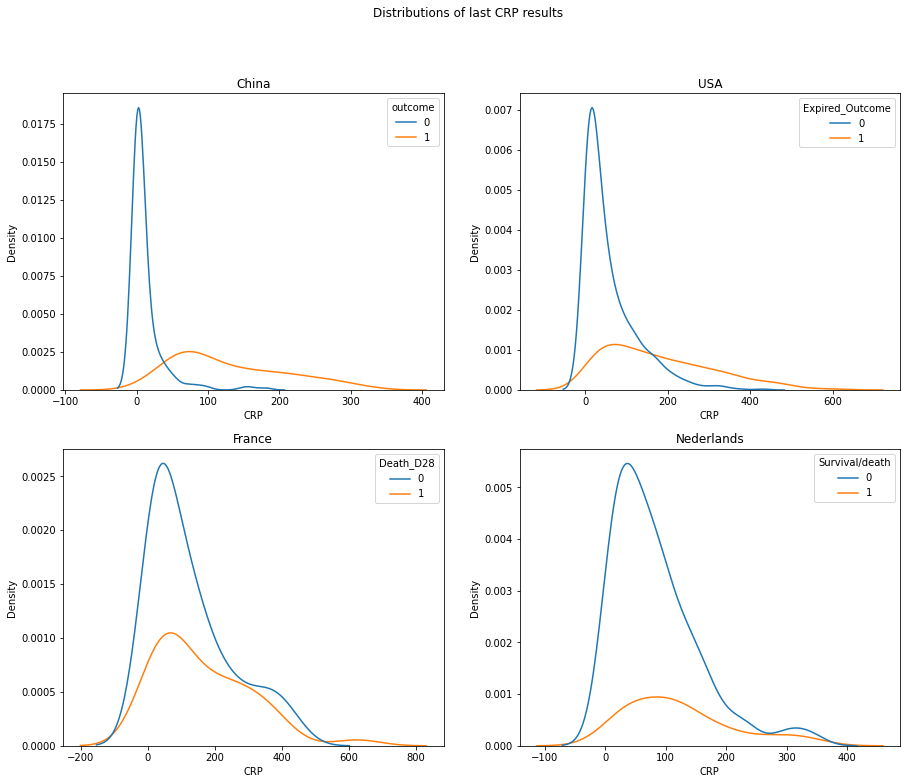

In [13]:
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(15, 12))

sns.kdeplot(data = china_new, x="Last_CRP", hue="outcome", ax = ax1)
ax1.set_title("China")
ax1.set_xlabel('CRP')

sns.kdeplot(data = usa, x="Last_CRP", hue="Expired_Outcome", ax = ax2)
ax2.set_title("USA")
ax2.set_xlabel('CRP')

sns.kdeplot(data = france1, x="crp_J5", hue="Death_D28", ax = ax3)
ax3.set_title("France")
ax3.set_xlabel('CRP')

sns.kdeplot(data = dutch, x="CRP", hue="Survival/death", ax = ax4)
ax4.set_title("Nederlands")
ax4.set_xlabel('CRP')

plt.suptitle('Distributions of last CRP results')
plt.show()

# crp w Chinach dla zmarłych rozkłada się inaczej niz dla ozdrowiałych, znów w innych krajach tego nie ma

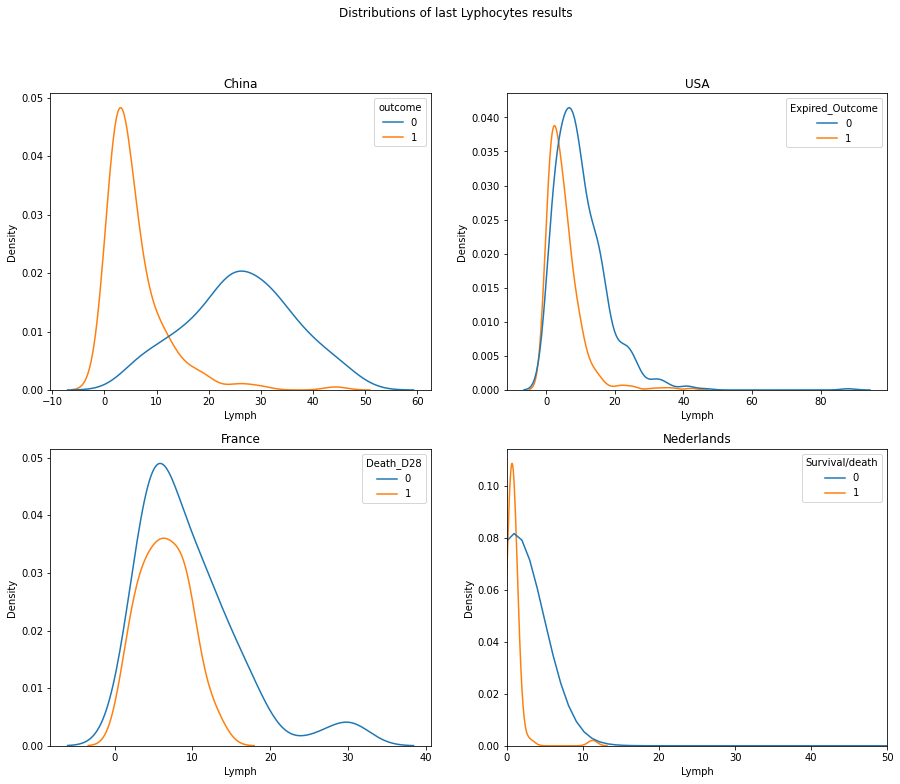

In [16]:
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(15, 12))

sns.kdeplot(data = china_new, x="Last_Lymph", hue="outcome", ax = ax1)
ax1.set_title("China")
ax1.set_xlabel('Lymph')

sns.kdeplot(data = usa, x="Last_Lymph", hue="Expired_Outcome", ax = ax2)
ax2.set_title("USA")
ax2.set_xlabel('Lymph')

sns.kdeplot(data = france1, x="L_pourc_J5", hue="Death_D28", ax = ax3)
ax3.set_title("France")
ax3.set_xlabel('Lymph')

sns.kdeplot(data = dutch, x="Lymphocytes", hue="Survival/death", ax = ax4)
ax4.set_title("Nederlands")
ax4.set_xlabel('Lymph')
ax4.set_xlim([0, 50])

plt.suptitle('Distributions of last Lyphocytes results')
plt.show()

#zmarli mieli mniej limfocytów, w Chinach zupełnie inna tendencja

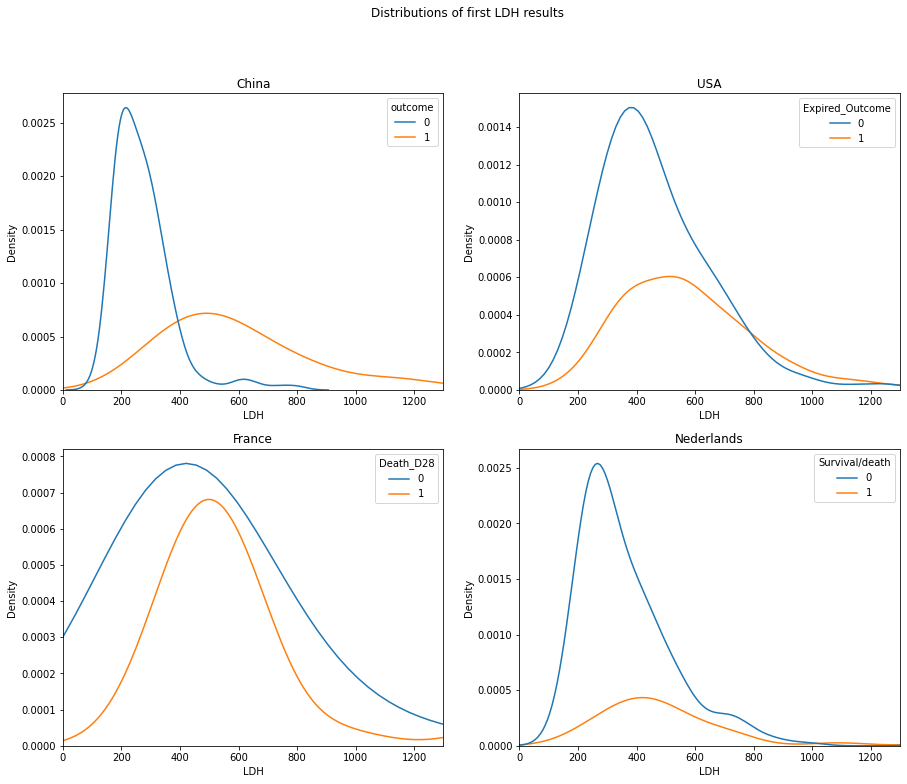

In [17]:
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(15, 12))

sns.kdeplot(data = china_new, x="First_LDH", hue="outcome", ax = ax1)
ax1.set_title("China")
ax1.set_xlabel('LDH')
ax1.set_xlim([0, 1300])

sns.kdeplot(data = usa, x="First_LDH", hue="Expired_Outcome", ax = ax2)
ax2.set_title("USA")
ax2.set_xlabel('LDH')
ax2.set_xlim([0, 1300])

sns.kdeplot(data = france1, x="ldh_j1", hue="Death_D28", ax = ax3)
ax3.set_title("France")
ax3.set_xlabel('LDH')
ax3.set_xlim([0, 1300])

sns.kdeplot(data = dutch, x="LD", hue="Survival/death", ax = ax4)
ax4.set_title("Nederlands")
ax4.set_xlabel('LDH')
ax4.set_xlim([0, 1300])

plt.suptitle('Distributions of first LDH results')
plt.show()

#jak wcześniej

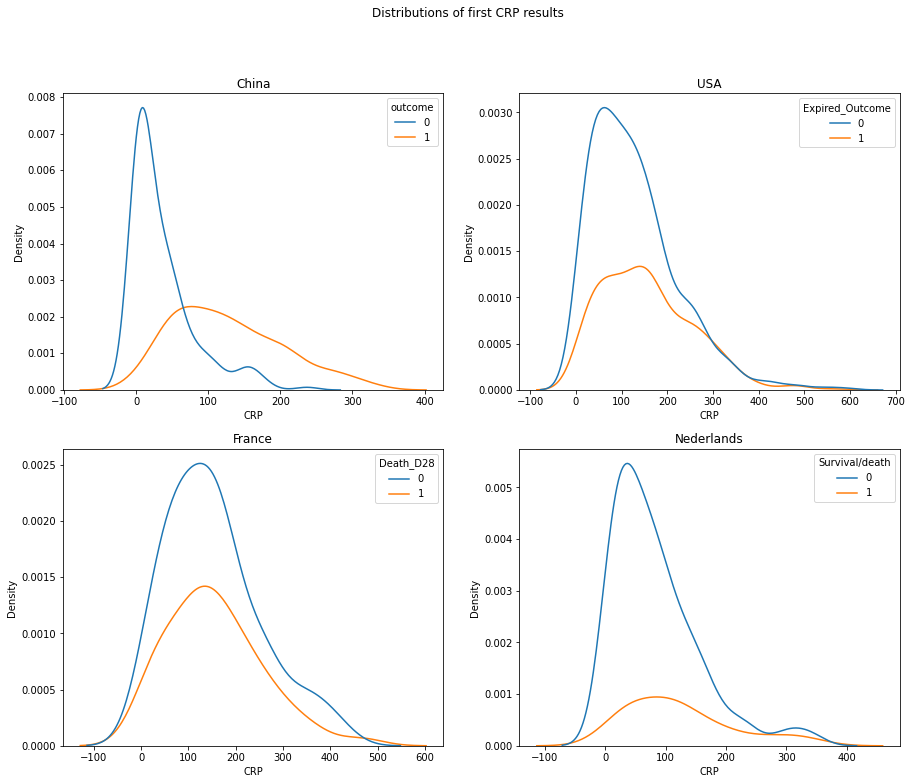

In [18]:
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(15, 12))

sns.kdeplot(data = china_new, x="First_CRP", hue="outcome", ax = ax1)
ax1.set_title("China")
ax1.set_xlabel('CRP')

sns.kdeplot(data = usa, x="First_CRP", hue="Expired_Outcome", ax = ax2)
ax2.set_title("USA")
ax2.set_xlabel('CRP')

sns.kdeplot(data = france1, x="crp_J1", hue="Death_D28", ax = ax3)
ax3.set_title("France")
ax3.set_xlabel('CRP')

sns.kdeplot(data = dutch, x="CRP", hue="Survival/death", ax = ax4)
ax4.set_title("Nederlands")
ax4.set_xlabel('CRP')

plt.suptitle('Distributions of first CRP results')
plt.show()

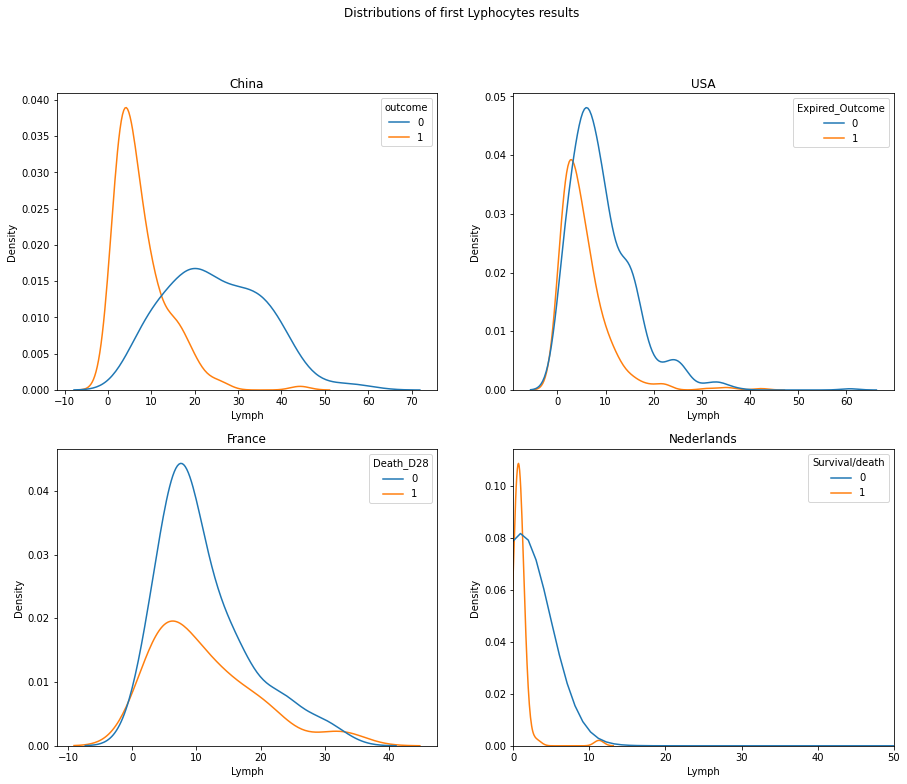

In [19]:
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(15, 12))

sns.kdeplot(data = china_new, x="First_Lymph", hue="outcome", ax = ax1)
ax1.set_title("China")
ax1.set_xlabel('Lymph')

sns.kdeplot(data = usa, x="First_Lymph", hue="Expired_Outcome", ax = ax2)
ax2.set_title("USA")
ax2.set_xlabel('Lymph')

sns.kdeplot(data = france1, x="L_pourc_J1", hue="Death_D28", ax = ax3)
ax3.set_title("France")
ax3.set_xlabel('Lymph')

sns.kdeplot(data = dutch, x="Lymphocytes", hue="Survival/death", ax = ax4)
ax4.set_title("Nederlands")
ax4.set_xlabel('Lymph')
ax4.set_xlim([0, 50])

plt.suptitle('Distributions of first Lyphocytes results')
plt.show()

## Porównanie modeli

Porównałem modele zbudowane na 3 zmiennych wyłonionych przez chińskich naukowców, za każdym razem model działa lepeij dla późniejszych badań, na chińskich danych działa najlepiej. Różni się istotność cech w zależności od kraju. 

In [20]:
def feature_importance(X, Y):    
    X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.3, random_state=42)
    
    importance = pd.DataFrame()
    importance['col'] = ['LDH', 'Lymph', 'CRP']
    importance['xgb'] = 0

    model_xgb = xgb.XGBClassifier(
                    max_depth=4
                    ,learning_rate=0.2
                    ,reg_lambda=1
                    ,n_estimators=150
                    ,subsample = 0.9
                    ,colsample_bytree = 0.9)
    model_xgb.fit(X_train, y_train)

    importance['xgb'] = importance['xgb'] + model_xgb.feature_importances_
    importance = importance.sort_values(axis=0, ascending=False, by='xgb')

    print(confusion_matrix(y_pred = model_xgb.predict(X), y_true = Y))
    
    df = importance.reset_index().drop('index', axis = 1)

    print(df)
    
    accu = model_xgb.score(X_test,y_test)
    
    print(f'xgboost accuarcy: {accu}')
    
    return df, accu

In [21]:
f_c, fcs = feature_importance(china_new[['First_LDH', 'First_Lymph', 'First_CRP']], china_new['outcome'])
l_c, lcs = feature_importance(china_new[['Last_LDH', 'Last_Lymph', 'Last_CRP']], china_new['outcome'])

f_c = f_c.rename(columns = {'xgb' : 'first'})
l_c = l_c.rename(columns = {'xgb' : 'last'})

c = pd.merge(f_c, l_c, on = 'col')

#=============================

f_u, fus = feature_importance(usa[['First_LDH', 'First_Lymph', 'First_CRP']], usa['Expired_Outcome'])
l_u, lus = feature_importance(usa[['Last_LDH', 'Last_Lymph', 'Last_CRP']], usa['Expired_Outcome'])

f_u = f_u.rename(columns = {'xgb' : 'first'})
l_u = l_u.rename(columns = {'xgb' : 'last'})

u = pd.merge(f_u, l_u, on = 'col')

#============================

f_f, ffs = feature_importance(france1[['ldh_j1', 'L_pourc_J1', 'crp_J1']], france1['Death_D28'])
l_f, lfs = feature_importance(france1[['ldh_j5', 'L_pourc_J5', 'crp_J5']], france1['Death_D28'])

f_f = f_u.rename(columns = {'xgb' : 'first'})
l_f = l_u.rename(columns = {'xgb' : 'last'})

f = pd.merge(f_f, l_f, on = 'col')

#==============================

d, fds = feature_importance(dutch[['LD', 'Lymphocytes', 'CRP']], dutch['Survival/death'])
d = f_u.rename(columns = {'xgb' : 'first'})

#==============================

c = c.melt(id_vars = 'col')
u = u.melt(id_vars = 'col')
f = f.melt(id_vars = 'col')

[[181  11]
 [ 14 145]]
     col       xgb
0    LDH  0.459336
1  Lymph  0.337529
2    CRP  0.203136
xgboost accuarcy: 0.7830188679245284
[[190   2]
 [  1 158]]
     col       xgb
0    LDH  0.658994
1    CRP  0.264214
2  Lymph  0.076792
xgboost accuarcy: 0.9811320754716981
[[626  52]
 [ 96 264]]
     col       xgb
0  Lymph  0.374078
1    LDH  0.325376
2    CRP  0.300547
xgboost accuarcy: 0.6217948717948718
[[653  25]
 [ 39 321]]
     col       xgb
0    CRP  0.405162
1    LDH  0.328355
2  Lymph  0.266482
xgboost accuarcy: 0.842948717948718
[[108   9]
 [ 19  42]]
     col       xgb
0  Lymph  0.348198
1    CRP  0.339954
2    LDH  0.311848
xgboost accuarcy: 0.5
[[107  10]
 [ 22  39]]
     col       xgb
0  Lymph  0.341847
1    CRP  0.341019
2    LDH  0.317134
xgboost accuarcy: 0.5555555555555556
[[238   6]
 [ 16  45]]
     col       xgb
0  Lymph  0.387179
1    CRP  0.312612
2    LDH  0.300209
xgboost accuarcy: 0.7608695652173914


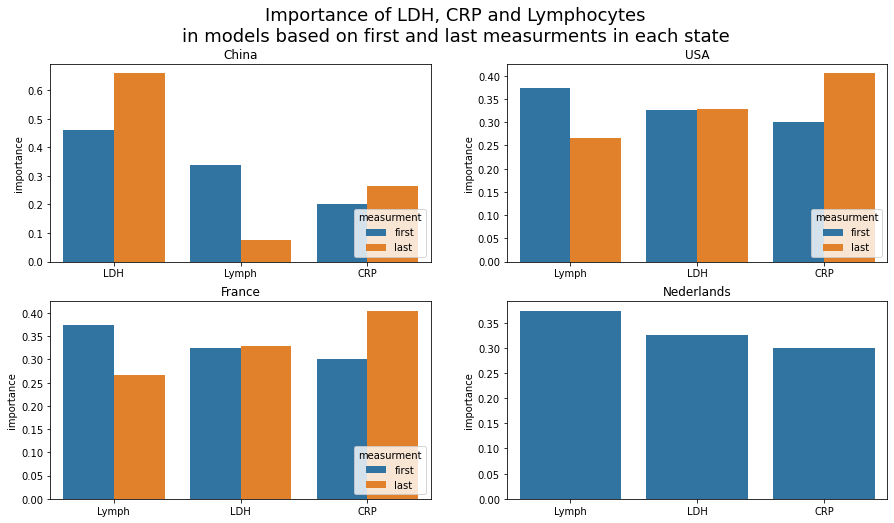

In [22]:
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize = (15, 8))
sns.barplot(data = c, x = 'col', y = 'value', hue = 'variable', ax = ax1)
sns.barplot(data = u, x = 'col', y = 'value', hue = 'variable', ax = ax2)
sns.barplot(data = f, x = 'col', y = 'value', hue = 'variable', ax = ax3)
sns.barplot(data = d, x = 'col', y = 'first', color = 'tab:blue', ax = ax4)

ax1.set_title('China', fontsize=12)
ax1.set_xlabel('')
ax1.set_ylabel('importance')
ax1.legend(title = 'measurment', bbox_to_anchor=(1,0), loc="lower right")

ax2.set_title('USA', fontsize=12)
ax2.set_xlabel('')
ax2.set_ylabel('importance')
ax2.legend(title = 'measurment', bbox_to_anchor=(1,0), loc="lower right")

ax3.set_title('France', fontsize=12)
ax3.set_xlabel('')
ax3.set_ylabel('importance')
ax3.legend(title = 'measurment', bbox_to_anchor=(1,0), loc="lower right")

ax4.set_title('Nederlands', fontsize=12)
ax4.set_xlabel('')
ax4.set_ylabel('importance')


plt.suptitle('Importance of LDH, CRP and Lymphocytes' + '\n' + 
             'in models based on first and last measurments in each state', fontsize=18)
plt.show()

Text(0.5, 1.0, 'Scores of models based on first and last measurments of each country')

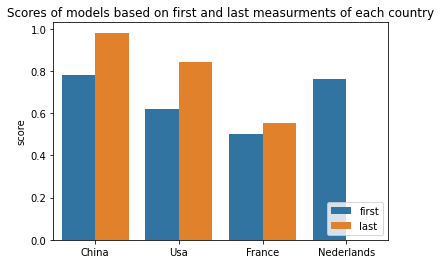

In [23]:
data = [['China', 'first', fcs], ['China', 'last', lcs],
        ['Usa', 'first', fus], ['Usa', 'last', lus],
        ['France', 'first', ffs], ['France', 'last', lfs],
        ['Nederlands', 'first', fds]]

scores = pd.DataFrame(data, columns = ['country', 'measurment', 'score'])

fig, ax = plt.subplots(1, 1)
sns.barplot(data = scores, x = 'country', y = 'score', hue = 'measurment', ax = ax)
ax.legend(bbox_to_anchor=(1,0), loc='lower right')
ax.set_xlabel('')
ax.set_title('Scores of models based on first and last measurments of each country')

In [24]:
feature_importance(china_new[['Last_LDH', 'Last_Lymph', 'Last_CRP']], china_new['outcome'])

[[190   2]
 [  1 158]]
     col       xgb
0    LDH  0.658994
1    CRP  0.264214
2  Lymph  0.076792
xgboost accuarcy: 0.9811320754716981


(     col       xgb
 0    LDH  0.658994
 1    CRP  0.264214
 2  Lymph  0.076792, 0.9811320754716981)

In [25]:
feature_importance(china_new[['First_LDH', 'First_Lymph', 'First_CRP']], china_new['outcome'])

[[181  11]
 [ 14 145]]
     col       xgb
0    LDH  0.459336
1  Lymph  0.337529
2    CRP  0.203136
xgboost accuarcy: 0.7830188679245284


(     col       xgb
 0    LDH  0.459336
 1  Lymph  0.337529
 2    CRP  0.203136, 0.7830188679245284)

In [26]:
feature_importance(usa[['Last_LDH', 'Last_Lymph', 'Last_CRP']], usa['Expired_Outcome'])

[[653  25]
 [ 39 321]]
     col       xgb
0    CRP  0.405162
1    LDH  0.328355
2  Lymph  0.266482
xgboost accuarcy: 0.842948717948718


(     col       xgb
 0    CRP  0.405162
 1    LDH  0.328355
 2  Lymph  0.266482, 0.842948717948718)

In [27]:
feature_importance(usa[['First_LDH', 'First_Lymph', 'First_CRP']], usa['Expired_Outcome'])

[[626  52]
 [ 96 264]]
     col       xgb
0  Lymph  0.374078
1    LDH  0.325376
2    CRP  0.300547
xgboost accuarcy: 0.6217948717948718


(     col       xgb
 0  Lymph  0.374078
 1    LDH  0.325376
 2    CRP  0.300547, 0.6217948717948718)

In [28]:
feature_importance(france1[['ldh_j5', 'L_pourc_J5', 'crp_J5']], france1['Death_D28'])

[[107  10]
 [ 22  39]]
     col       xgb
0  Lymph  0.341847
1    CRP  0.341019
2    LDH  0.317134
xgboost accuarcy: 0.5555555555555556


(     col       xgb
 0  Lymph  0.341847
 1    CRP  0.341019
 2    LDH  0.317134, 0.5555555555555556)

In [29]:
feature_importance(france1[['ldh_j5', 'L_pourc_J5', 'crp_J5']], france1['Death_D28'])

[[107  10]
 [ 22  39]]
     col       xgb
0  Lymph  0.341847
1    CRP  0.341019
2    LDH  0.317134
xgboost accuarcy: 0.5555555555555556


(     col       xgb
 0  Lymph  0.341847
 1    CRP  0.341019
 2    LDH  0.317134, 0.5555555555555556)

In [30]:
feature_importance(dutch[['LD', 'Lymphocytes', 'CRP']], dutch['Survival/death'])

[[238   6]
 [ 16  45]]
     col       xgb
0  Lymph  0.387179
1    CRP  0.312612
2    LDH  0.300209
xgboost accuarcy: 0.7608695652173914


(     col       xgb
 0  Lymph  0.387179
 1    CRP  0.312612
 2    LDH  0.300209, 0.7608695652173914)

## Modele na połączonych danych

model na połączonych danych lepiej działa dla ostatnich wyników, LDH nie jest dużo ważniejsze od innych cech.

In [31]:
d = dutch[['Survival/death','LD', 'CRP', 'Lymphocytes']].rename(
    columns = {'Survival/death' : 'outcome', 'LD' : 'LDH', 'Lymphocytes' : 'Lymph'})
d['country'] = 'Nederlands'

u = usa[['Expired_Outcome', 'First_LDH', 'First_CRP', 'First_Lymph']].rename(
    columns = {'Expired_Outcome' : 'outcome', 'First_LDH' : 'LDH', 'First_CRP' : 'CRP',  'First_Lymph' : 'Lymph'})
u['country'] = 'usa'

f = france1[['Death_D28', 'ldh_j1', 'crp_J1', 'L_pourc_J1']].rename(
    columns = {'Death_D28' : 'outcome', 'ldh_j1' : 'LDH', 'crp_J1' : 'CRP',  'L_pourc_J1' : 'Lymph'})
f['country'] = 'france'

c = china_new[['outcome', 'First_LDH', 'First_CRP', 'First_Lymph']].rename(
    columns = {'First_LDH' : 'LDH', 'First_CRP' : 'CRP',  'First_Lymph' : 'Lymph'})
c['country'] = 'china'

all_first = pd.concat([c, u, d, f])
all_first

,outcome,LDH,CRP,Lymph,country
0,0,306.0,43.1,22.6000,china
1,0,738.0,27.4,7.5000,china
2,0,328.0,42.3,19.1000,china
3,0,338.0,108.2,12.5000,china
4,0,195.0,7.0,37.9000,china
...,...,...,...,...,...
173,0,503.0,181.1,4.7619,france
174,0,466.0,293.4,1.9417,france
175,0,550.0,43.4,15.7895,france
176,0,579.0,339.5,6.5041,france


In [32]:
feature_importance(all_first[['LDH', 'Lymph', 'CRP']], all_first['outcome'])

[[1139   92]
 [ 206  435]]
     col       xgb
0    LDH  0.408489
1  Lymph  0.327492
2    CRP  0.264019
xgboost accuarcy: 0.6583629893238434


(     col       xgb
 0    LDH  0.408489
 1  Lymph  0.327492
 2    CRP  0.264019, 0.6583629893238434)

In [33]:
d = dutch[['Survival/death','LD', 'CRP', 'Lymphocytes']].rename(
    columns = {'Survival/death' : 'outcome', 'LD' : 'LDH', 'Lymphocytes' : 'Lymph'})
d['country'] = 'Nederlands'

u = usa[['Expired_Outcome', 'Last_LDH', 'Last_CRP', 'Last_Lymph']].rename(
    columns = {'Expired_Outcome' : 'outcome', 'Last_LDH' : 'LDH', 'Last_CRP' : 'CRP',  'Last_Lymph' : 'Lymph'})
u['country'] = 'usa'

f = france1[['Death_D28', 'ldh_j5', 'crp_J5', 'L_pourc_J5']].rename(
    columns = {'Death_D28' : 'outcome', 'ldh_j5' : 'LDH', 'crp_J5' : 'CRP',  'L_pourc_J5' : 'Lymph'})
f['country'] = 'france'

c = china_new[['outcome', 'Last_LDH', 'Last_CRP', 'Last_Lymph']].rename(
    columns = {'Last_LDH' : 'LDH', 'Last_CRP' : 'CRP',  'Last_Lymph' : 'Lymph'})
c['country'] = 'china'

all_last = pd.concat([c, u, d, f])
all_last

,outcome,LDH,CRP,Lymph,country
0,0,206.0,2.6,25.9000,china
1,0,282.0,27.4,9.2000,china
2,0,226.0,3.6,27.3000,china
3,0,249.0,14.5,16.5000,china
4,0,179.0,0.8,23.6000,china
...,...,...,...,...,...
173,0,NaN,239.5,5.2632,france
174,0,NaN,NaN,6.2500,france
175,0,NaN,NaN,NaN,france
176,0,NaN,308.7,2.9630,france


In [34]:
feature_importance(all_last[['LDH', 'Lymph', 'CRP']], all_last['outcome'])

[[1159   72]
 [ 115  526]]
     col       xgb
0    LDH  0.464446
1    CRP  0.290022
2  Lymph  0.245532
xgboost accuarcy: 0.7811387900355872


(     col       xgb
 0    LDH  0.464446
 1    CRP  0.290022
 2  Lymph  0.245532, 0.7811387900355872)

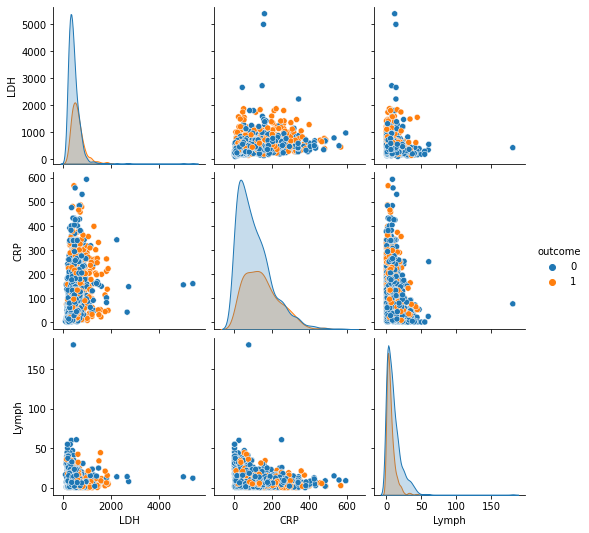

In [38]:
sns.pairplot(all_first, hue="outcome")

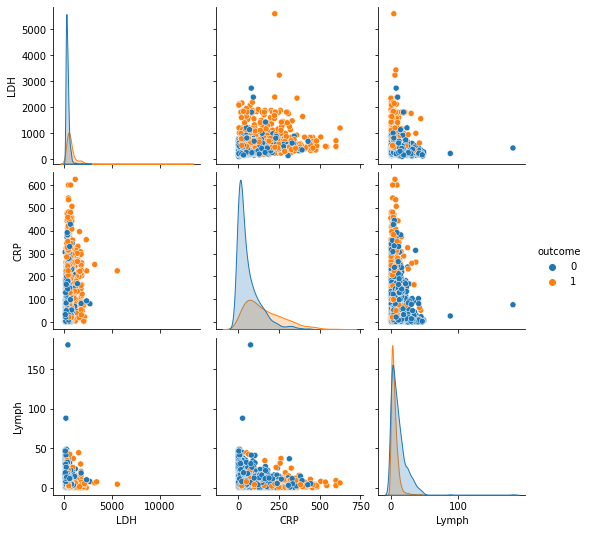

In [39]:
sns.pairplot(all_last, hue="outcome")